## Importing Libraries

In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
data_path = 'train'

## Loading images, resizing them and converting them to grey scale

In [3]:
images = []
labels = []

for filename in os.listdir(data_path):
    if "cat" in filename.lower():
        labels.append(1)  # 1 for cat
    elif "dog" in filename.lower():
        labels.append(0)  # 0 for dog
    else:
        continue

    image_path = os.path.join(data_path, filename)
    image = cv2.imread(image_path)
    image = cv2.resize(image, (64, 64))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    images.append(image.flatten())
    
X = np.array(images)
y = np.array(labels)

## Building The Model

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=69)

In [5]:
from sklearn.decomposition import PCA

n_components = 150

# Initialize PCA and fit on training data
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Initialize the SVM classifier
svm_model = SVC(kernel='rbf',gamma='scale', C=5.0, random_state=42)

# Train the model with reduced dimensions
svm_model.fit(X_train_pca, y_train)

y_pred = svm_model.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 65.92%


## Evaluate The Model

In [6]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Display the classification report
print(classification_report(y_test, y_pred))

# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Accuracy: 65.92%
              precision    recall  f1-score   support

           0       0.65      0.69      0.67      4357
           1       0.67      0.63      0.65      4393

    accuracy                           0.66      8750
   macro avg       0.66      0.66      0.66      8750
weighted avg       0.66      0.66      0.66      8750

[[2992 1365]
 [1617 2776]]


## Testing the model on another data

In [7]:
data_test_path = 'test1'

In [8]:
test_images = []

img_width, img_height = 64, 64

for file_name in os.listdir(data_test_path):
    if file_name.endswith(".jpg") or file_name.endswith(".png"):
        img_path = os.path.join(data_test_path, file_name)
        
        img = cv2.imread(img_path)
        
        img = cv2.resize(img, (img_width, img_height))
        
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        img_flat = img.flatten()

        
        test_images.append(img_flat)

In [9]:
x_test_data=np.array(test_images)
x_test_data=pca.transform(x_test_data)
pred_test_data = svm_model.predict(x_test_data)

In [17]:
pred_test_data[21:36]

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0])

## Visualizing The resluts

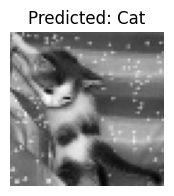

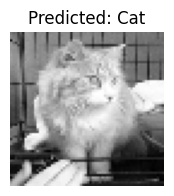

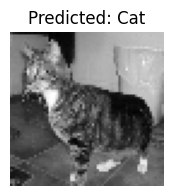

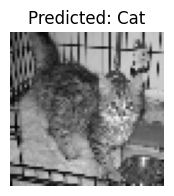

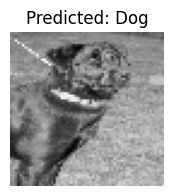

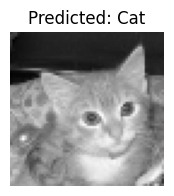

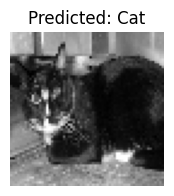

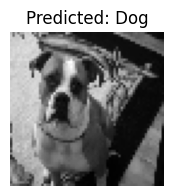

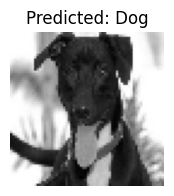

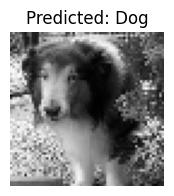

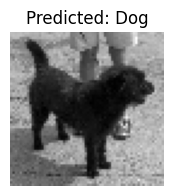

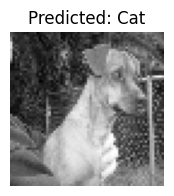

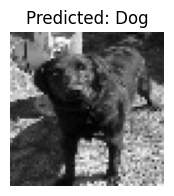

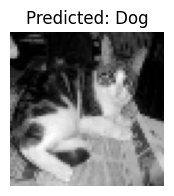

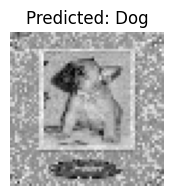

In [18]:
import matplotlib.pyplot as plt

start_index = 21
end_index = 36

for i in range(start_index, end_index):
    plt.figure(figsize=(2, 2))
    plt.imshow(test_images[i].reshape(64, 64), cmap='gray')  
    plt.title(f'Predicted: {"Cat" if pred_test_data[i] == 1 else "Dog"}')
    plt.axis('off')
    plt.show()